# TWITTER SENTIMENTAL ANALYSIS

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
config = pd.read_csv('./config.csv')

In [3]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [4]:
auth = tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit= True)

In [5]:
twitterAccount = 'imVkohli'

In [6]:
tweets  = tweepy.Cursor(twitterApi.user_timeline,
                        screen_name = twitterAccount,
                        count = None,
                        since_id = None,
                        max_id = None,trim_user = True,exclude_replies=True,contribubter_details = False ,
                        include_entities=False).items(100);

# Creating Dataframe

In [7]:
dataframe = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ['Tweet'])

In [8]:
dataframe.head()

,Tweet
0,Thanks to each &amp; every one of you who has ...
1,I have nothing but gratitude for all the healt...
2,3.6 crores in less than 24 hours! Overwhelmed ...
3,Requesting you all to come forward and show yo...
4,Anushka and I have started a campaign on @kett...


In [9]:
def cleanuptweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT : ','',text)
    text = re.sub(r'http?:\/\/[A-Za-z0-9\.\/]+','',text)
    return text

In [10]:
dataframe['Tweet'] = dataframe['Tweet'].apply(cleanuptweet) 

In [11]:
def gettextsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [12]:
def gettextpolarity(text):
    return TextBlob(text).sentiment.polarity

In [13]:
dataframe['Subjectivity'] = dataframe['Tweet'].apply(gettextsubjectivity)
dataframe['Polarity'] = dataframe['Tweet'].apply(gettextpolarity)

In [14]:
dataframe.head(101)

,Tweet,Subjectivity,Polarity
0,Thanks to each &amp; every one of you who has ...,0.466667,0.166667
1,I have nothing but gratitude for all the healt...,0.000000,0.000000
2,3.6 crores in less than 24 hours! Overwhelmed ...,0.066667,-0.208333
3,Requesting you all to come forward and show yo...,0.000000,0.000000
4,"Anushka and I have started a campaign on , to ...",0.000000,0.000000
...,...,...,...
95,Many happy returns of the day . 🎂 Wishing you ...,0.625000,0.650000
96,I’m back on the field doing what I do best. Re...,0.225000,0.291667
97,Wishing all the best for today's match and fo...,0.300000,1.000000
98,Fuel Up ⛽ https://t.co/5cNb1G8gd5,0.000000,0.000000


In [15]:
dataframe = dataframe.drop(dataframe[dataframe['Tweet']==''].index)

In [16]:
dataframe.head(101)

,Tweet,Subjectivity,Polarity
0,Thanks to each &amp; every one of you who has ...,0.466667,0.166667
1,I have nothing but gratitude for all the healt...,0.000000,0.000000
2,3.6 crores in less than 24 hours! Overwhelmed ...,0.066667,-0.208333
3,Requesting you all to come forward and show yo...,0.000000,0.000000
4,"Anushka and I have started a campaign on , to ...",0.000000,0.000000
...,...,...,...
95,Many happy returns of the day . 🎂 Wishing you ...,0.625000,0.650000
96,I’m back on the field doing what I do best. Re...,0.225000,0.291667
97,Wishing all the best for today's match and fo...,0.300000,1.000000
98,Fuel Up ⛽ https://t.co/5cNb1G8gd5,0.000000,0.000000


In [17]:
def gettextanalysis(a):
    if a<0 :
         return 'Negative'
    elif a==0 :
         return 'Neutral'
    else:
         return 'Positive'

In [18]:
dataframe['Score'] = dataframe['Polarity'].apply(gettextanalysis) 

In [19]:
dataframe.head(101)

,Tweet,Subjectivity,Polarity,Score
0,Thanks to each &amp; every one of you who has ...,0.466667,0.166667,Positive
1,I have nothing but gratitude for all the healt...,0.000000,0.000000,Neutral
2,3.6 crores in less than 24 hours! Overwhelmed ...,0.066667,-0.208333,Negative
3,Requesting you all to come forward and show yo...,0.000000,0.000000,Neutral
4,"Anushka and I have started a campaign on , to ...",0.000000,0.000000,Neutral
...,...,...,...,...
95,Many happy returns of the day . 🎂 Wishing you ...,0.625000,0.650000,Positive
96,I’m back on the field doing what I do best. Re...,0.225000,0.291667,Positive
97,Wishing all the best for today's match and fo...,0.300000,1.000000,Positive
98,Fuel Up ⛽ https://t.co/5cNb1G8gd5,0.000000,0.000000,Neutral


In [20]:
Positive = dataframe[dataframe['Score']=='Positive']
print(str(Positive.shape[0]/(dataframe.shape[0])*100)+ '% of positive tweets')
p=Positive.shape[0]/dataframe.shape[0]*100

56.00000000000001% of positive tweets


In [21]:
Negative = dataframe[dataframe['Score']=='Negative']
print(str(Negative.shape[0]/(dataframe.shape[0])*100)+ '% of negative tweets')
n=Negative.shape[0]/dataframe.shape[0]*100

8.0% of negative tweets


In [22]:
Neutral = dataframe[dataframe['Score']=='Neutral']
print(str(Neutral.shape[0]/(dataframe.shape[0])*100)+ '% of neutral tweets')
ne=Neutral.shape[0]/dataframe.shape[0]*100

36.0% of neutral tweets


In [23]:
Explore = (0,0.1,0)
Labels = 'Positive','Negative','Neutral'
size=[p,n,ne]
colours = ['greenyellow', 'orange' , 'gold']

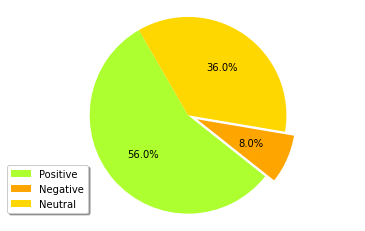

In [24]:
plt.pie(size,explode = Explore,colors = colours,autopct='%1.1f%%',startangle=120)
plt.legend(Labels, loc= (-0.05,0.05) , shadow = True)
plt.axis('equal')
plt.savefig('Sentimental_Analysis.png')

<BarContainer object of 3 artists>

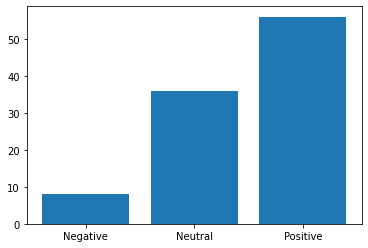

In [25]:
Labels = dataframe.groupby('Score').count().index.values
values = dataframe.groupby('Score').size().values
plt.bar(Labels,values)

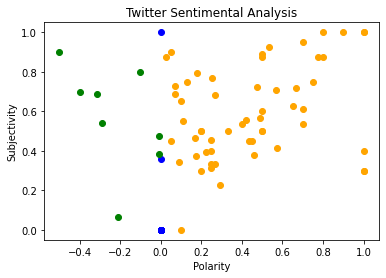

In [26]:
for index,row in dataframe.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color= 'orange')
    if row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color= 'green')
    if row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color= 'blue')
plt.title('Twitter Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel("Subjectivity")
plt.show()